In [1]:
import matplotlib.pyplot as plt

from keras.datasets import mnist

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.pipeline import Pipeline

Loading MNIST data


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Shape of training data (60000, 28, 28)
Shape of test data (10000, 28, 28)
Shape of training labels (60000,)
Shape of test labels (10000,)


In [3]:
#Flattening
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

#Normalising
X_train = X_train/255
X_test = X_test/255

In [4]:
print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

Shape of training data (60000, 784)
Shape of test data (10000, 784)
Shape of training labels (60000,)
Shape of test labels (10000,)


In [5]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

helper functions

In [6]:
def train_classifiers(estimator, X_train, y_train, cv, name):
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(
        estimator, X_train, y_train, cv = cv, scoring='f1_macro'
    )

    print(f"On an average, {name} model has f1 score of "
            f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.")


In [7]:
def eval(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)

    print("# Classification report")
    print(classification_report(y_test, y_pred))

    print("# Confusion matrix")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.title('Confusion matrix')
    plt.show()

#### Adaboost

uses decision stumps as week learners

In [9]:
abc_pipeline = Pipeline([
    ("classifier", AdaBoostClassifier())
])
train_classifiers(
    abc_pipeline, X_train, y_train.ravel(), cv, "AdaBoostClassifier"
)

On an average, AdaBoostClassifier model has f1 score of 0.712 +/- 0.016 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       980
           1       0.85      0.94      0.90      1135
           2       0.79      0.58      0.67      1032
           3       0.68      0.67      0.68      1010
           4       0.72      0.72      0.72       982
           5       0.69      0.59      0.64       892
           6       0.72      0.86      0.78       958
           7       0.68      0.78      0.73      1028
           8       0.66      0.68      0.67       974
           9       0.62      0.55      0.58      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.73     10000

# Confusion matrix


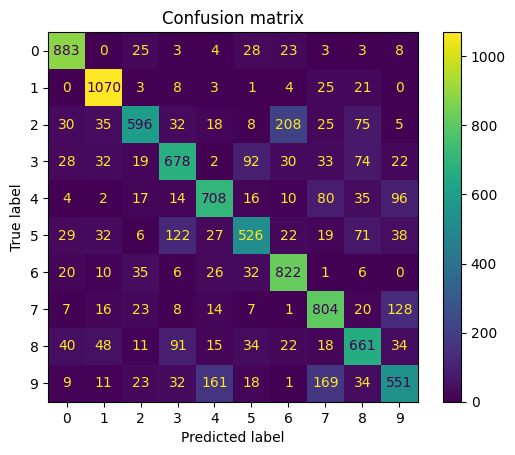

In [10]:
eval(abc_pipeline, X_test, y_test)

#### Gradient Boosting

uses decision trees as week learners

In [11]:
gbc_pipeline = Pipeline([
    ("classifier", GradientBoostingClassifier(n_estimators=10))
])
train_classifiers(
    gbc_pipeline, X_train, y_train.ravel(), cv, "GradientBoostingClassifier"
)

On an average, GradientBoostingClassifier model has f1 score of 0.835 +/- 0.003 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       980
           1       0.89      0.95      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.81      0.84      0.83      1010
           4       0.79      0.85      0.82       982
           5       0.87      0.70      0.78       892
           6       0.93      0.85      0.89       958
           7       0.91      0.82      0.86      1028
           8       0.76      0.81      0.78       974
           9       0.75      0.83      0.79      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000

# Confusion matrix


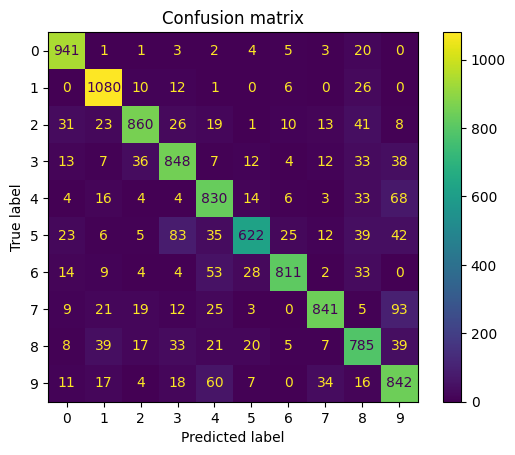

In [12]:
eval(gbc_pipeline, X_test, y_test)

#### XGBoost
efficient version of gradient boosting. it performs regularization to obtain better generalized results

In [8]:
xbc_pipeline = Pipeline([
    ("classifier", XGBClassifier())
])
train_classifiers(
    xbc_pipeline, X_train, y_train.ravel(), cv, "XGBoostClassifier"
)

On an average, XGBoostClassifier model has f1 score of 0.975 +/- 0.001 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

# Confusion matrix


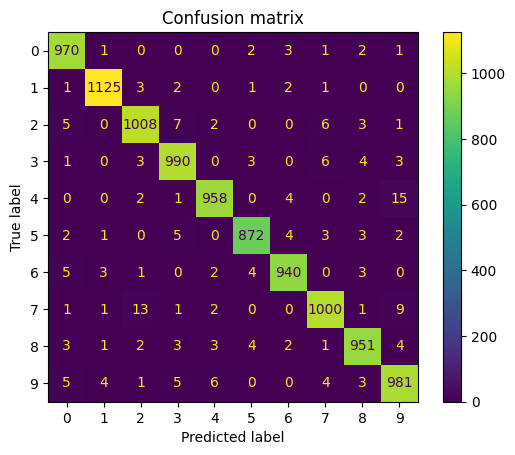

In [10]:
eval(xbc_pipeline, X_test, y_test)